## **FINAL PROJECT - DSCI 100** 
Emily Chai

*Question: Can we predict a player's total time spent on the server based on their demographic (age)?*

In [2]:
#Loading the packages into our notebook
library(tidyverse)
library(repr)
library(infer)
library(tidymodels)
library(tidyclust)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.0.1
✔ recipes      1.1.0     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter

In [3]:
#loading in the csv files from canvas

players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


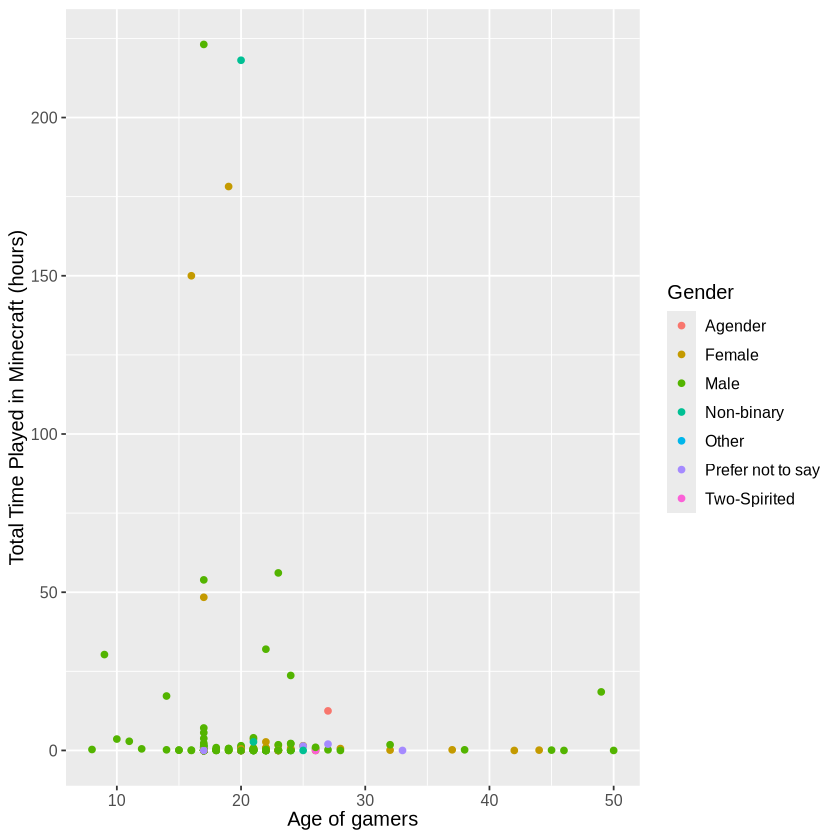

In [4]:
players_plot <- ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(aes(colour = gender)) +
  labs(x = "Age of gamers", y = "Total Time Played in Minecraft (hours)", colour = "Gender") +
  theme(text = element_text(size = 12))
players_plot

Age,hours_average
<dbl>,<dbl>
8,0.3
9,30.3
10,3.6
⋮,⋮
49,18.50
50,0.00
NA,0.15


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


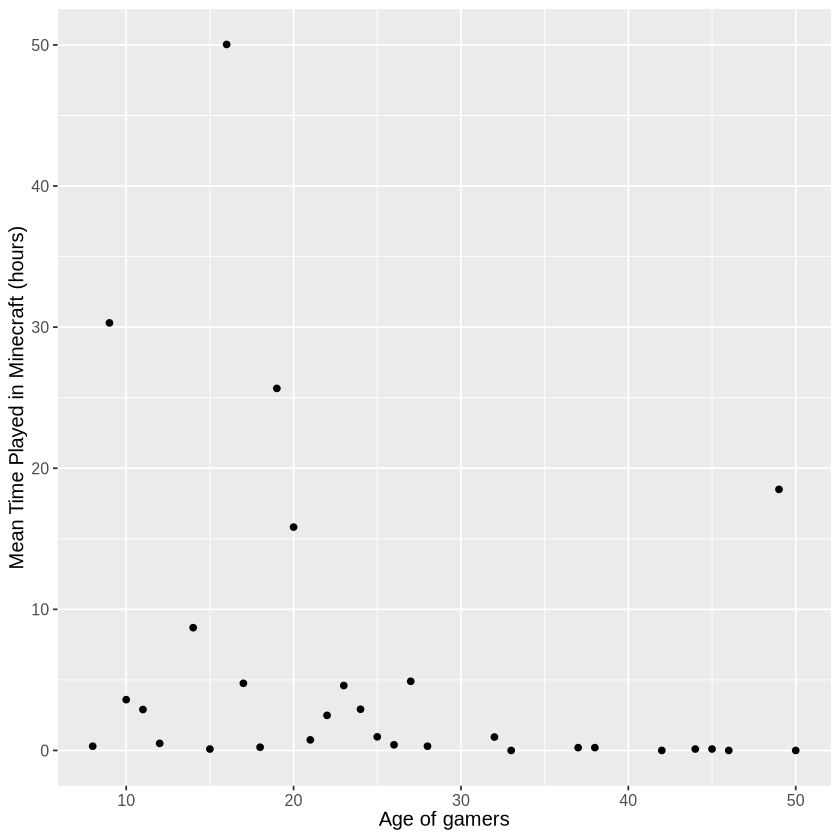

In [5]:
players_mean_playtime <- players |>
    group_by(Age) |>
    summarise(hours_average = mean(played_hours, na.rm = TRUE))
players_mean_playtime

players_mean_plot <- ggplot(players_mean_playtime, aes(x = Age, y = hours_average)) +
  geom_point() +
  labs(x = "Age of gamers", y = "Mean Time Played in Minecraft (hours)", colour = "Gender") +
  theme(text = element_text(size = 12))
players_mean_plot


In [6]:
#splitting dataset
set.seed(1234)
players_split <- initial_split(players, prop = 0.75, strata = played_hours)
players_split
players_training <- training(players_split)
players_training
players_testing <- testing(players_split)
players_testing

<Training/Testing/Total>
<146/50/196>

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,32.0,Sidney,Male,22
Pro,FALSE,d46bd29a2ed08e3500bd8729085ef4b6f0ca65baf4c756f88b6bedf7a18e0352,1.7,Asher,Male,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,e3f0ad9aadd27f3d1d9197e58546d045018daa767675033d9af9a2b74e763739,0,Jasper,Male,17
Amateur,FALSE,514ebbaa30f0d162127e065ab780892b7930cf8d75944d5eb09c91c02d6026c7,0,Orion,Male,17
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0,Bailey,Female,17


In [7]:
players <- players |>
  filter(!is.na(Age), !is.na(played_hours), !is.na(gender)) |>
  mutate(gender = as.factor(gender))

players_spec <- nearest_neighbor(weight_func = "rectangular" , neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 
players_spec

players_recipe <- recipe(played_hours ~ Age, data = players_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
players_recipe

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [8]:
players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)

players_workflow <- workflow() |>
       add_recipe(players_recipe) |>
       add_model(players_spec) 
players_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [9]:
players_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))
players_results <- players_workflow |>
       tune_grid(resamples = players_vfold, grid = players_vals) |>
       collect_metrics()
players_results

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 28 rows.
               ✖ Assigned data has 29 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 29 to size 28.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,15.63337863,4,11.705174707,Preprocessor1_Model01
1,rsq,standard,0.01455012,4,0.009602348,Preprocessor1_Model01
3,rmse,standard,15.84935137,4,11.622410653,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,rsq,standard,0.020551838,4,0.017284847,Preprocessor1_Model24
49,rmse,standard,18.124739376,4,10.625659115,Preprocessor1_Model25
49,rsq,standard,0.003581814,4,0.001233358,Preprocessor1_Model25


In [10]:
players_min <- players_results |>
    filter(.metric == "rmse") |>
    slice_min(mean, n = 1)
players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,15.63338,4,11.70517,Preprocessor1_Model01


In [11]:
players_min <- players_min |>
          pull(neighbors)

players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = players_min) |>
          set_engine("kknn") |>
          set_mode("regression")

players_best_fit <- workflow() |>
         add_recipe(players_recipe) |>
          add_model(players_best_spec) |>
          fit(data = players_training)

players_testing_1 <- players_testing |>
    filter(!is.na(Age))

players_summary <- players_best_fit |>
           predict(players_testing_1) |>
           bind_cols(players_testing_1) |>
           metrics(truth = played_hours, estimate = .pred)
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,23.632583007
rsq,standard,0.001693107
mae,standard,6.144897959


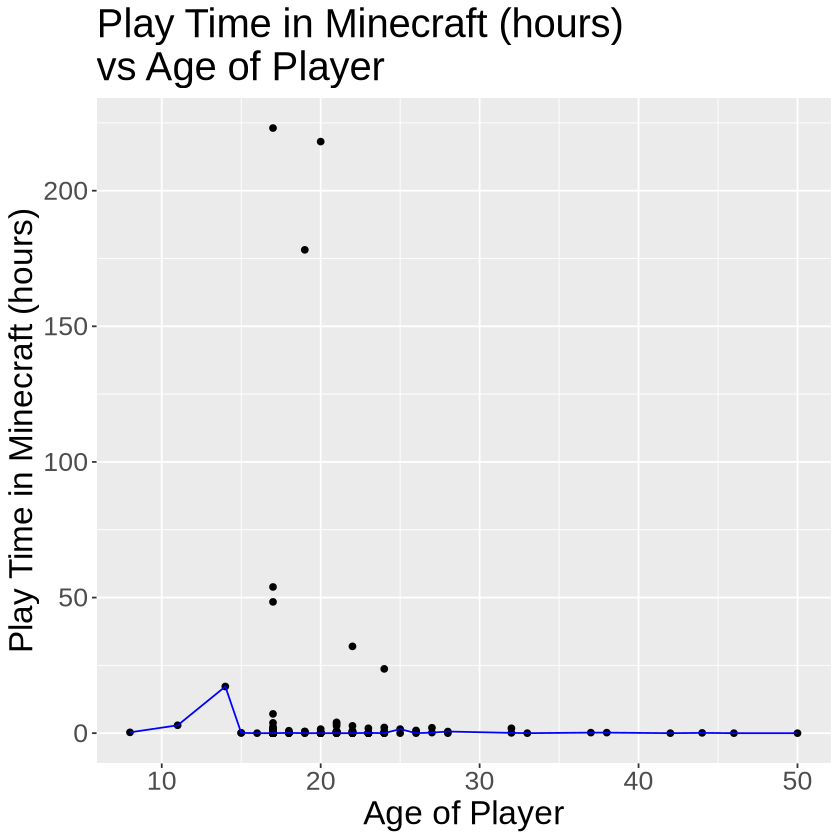

In [12]:
players_training_1 <- players_training |>
    filter(!is.na(Age))

players_preds <- players_best_fit |>
predict(players_training_1) |>
bind_cols(players_training_1)

players_plot <- players_preds |>
arrange(Age) |>
ggplot(aes(x = Age, y = played_hours)) +
geom_point() +
geom_line(aes(y = .pred), colour = "blue") +
    labs(x = "Age of Player", 
         y = "Play Time in Minecraft (hours)", 
         title = "Play Time in Minecraft (hours)\nvs Age of Player") +
        theme(text = element_text(size = 20))
players_plot